# New Section

=== Sustainable Fashion Messaging Impact Analysis ===

Generating synthetic dataset...

Performing exploratory data analysis...
Dataset shape: (5000, 13)

Sample of the dataset:
  customer_id age_group  gender  income     education  location  \
0       C0000     25-34  Female  Medium  Some College  Suburban   
1       C0001       55+  Female  Medium      Bachelor     Urban   
2       C0002     45-54    Male     Low      Bachelor     Urban   
3       C0003     35-44  Female  Medium   High School  Suburban   
4       C0004     18-24    Male  Medium   High School     Urban   

   environmental_impact  social_justice  quality_durability  cost_savings  \
0                     9               3                   4             4   
1                     9               8                   3             4   
2                     0               7                   0             0   
3                     2               0                   6             5   
4                     3           

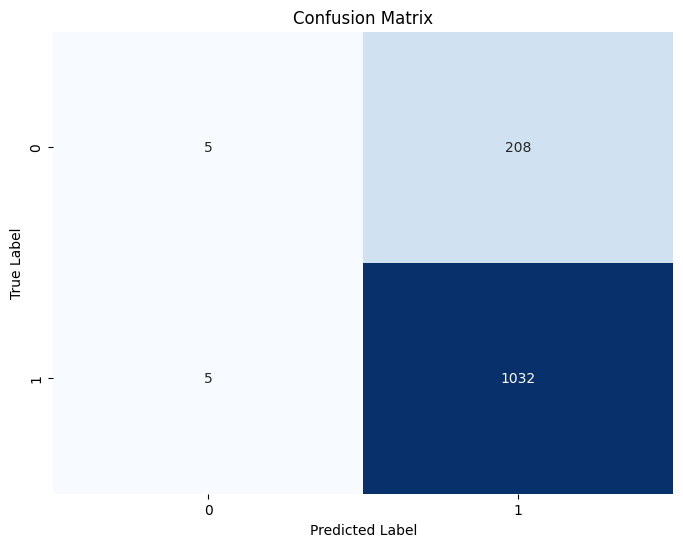

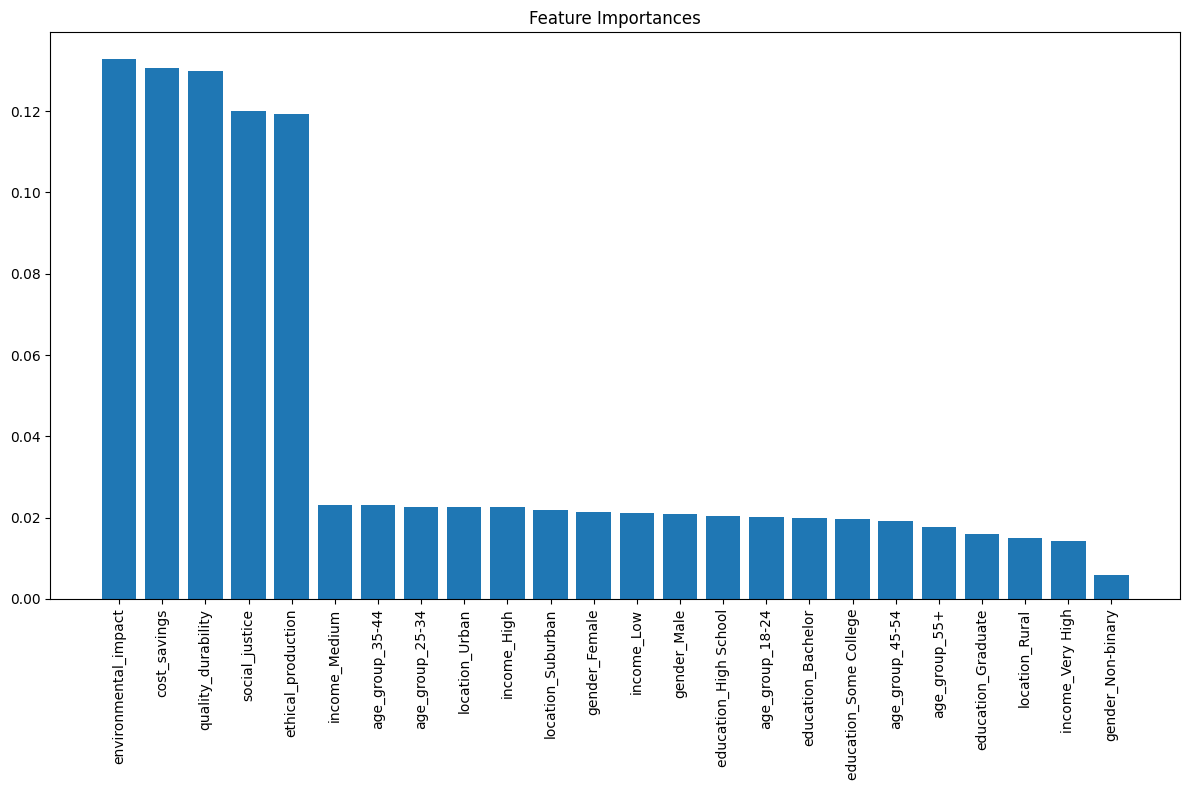

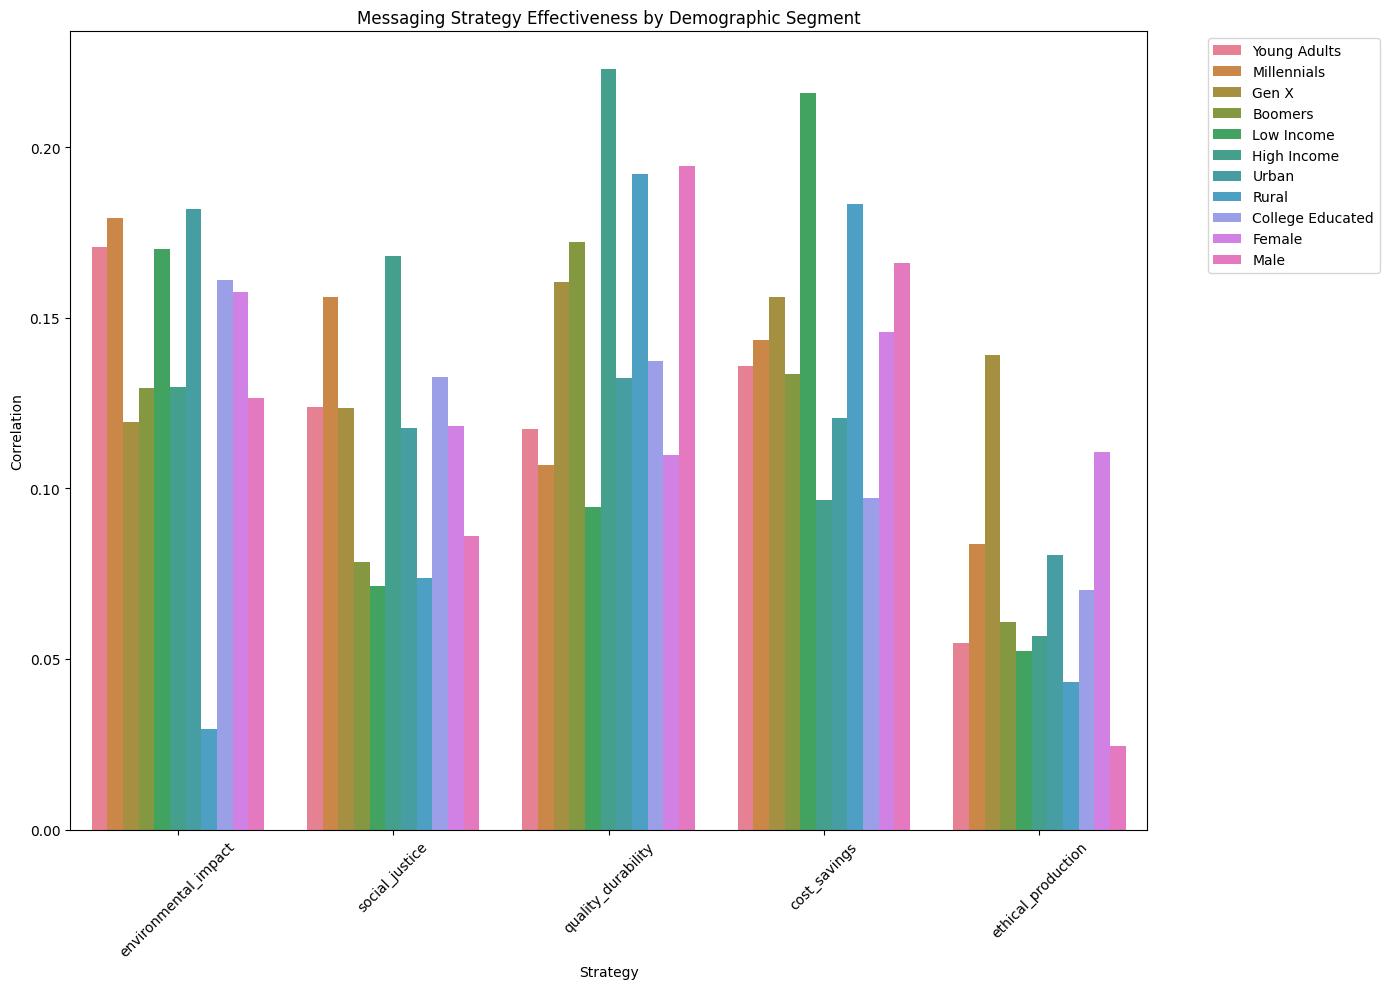

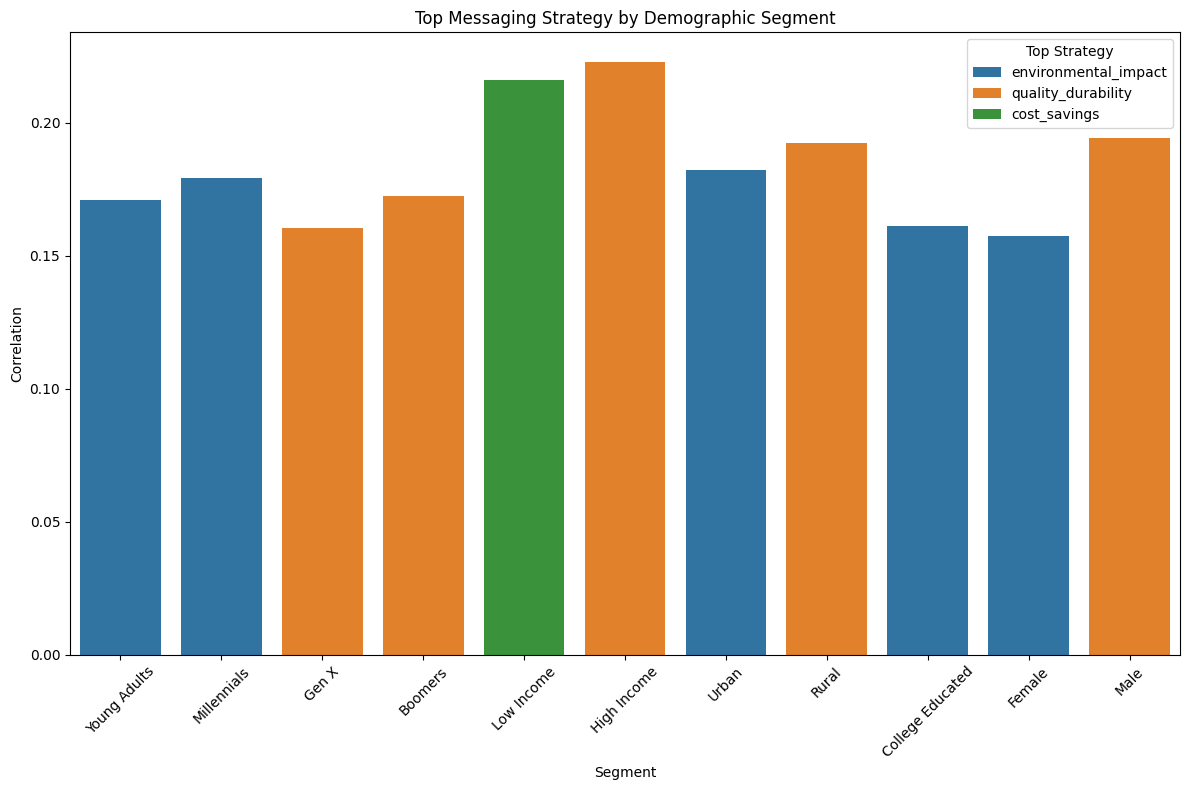

In [11]:
"""
Random Forest Model for Sustainable Fashion Messaging Impact Analysis

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import random
from datetime import datetime, timedelta


np.random.seed(42)
random.seed(42)



def generate_dataset(n_samples=5000):
    """Generate a realistic sustainable fashion consumer dataset"""


    age_groups = ['18-24', '25-34', '35-44', '45-54', '55+']
    genders = ['Female', 'Male', 'Non-binary']
    income_levels = ['Low', 'Medium', 'High', 'Very High']
    education_levels = ['High School', 'Some College', 'Bachelor', 'Graduate']
    locations = ['Urban', 'Suburban', 'Rural']


    data = {
        'customer_id': [f'C{i:04d}' for i in range(n_samples)],
        'age_group': np.random.choice(age_groups, n_samples, p=[0.22, 0.28, 0.20, 0.15, 0.15]),
        'gender': np.random.choice(genders, n_samples, p=[0.60, 0.38, 0.02]),
        'income': np.random.choice(income_levels, n_samples, p=[0.25, 0.40, 0.25, 0.10]),
        'education': np.random.choice(education_levels, n_samples, p=[0.20, 0.30, 0.35, 0.15]),
        'location': np.random.choice(locations, n_samples, p=[0.55, 0.35, 0.10])
    }


    messaging_strategies = [
        'environmental_impact',  # Focus on planet-friendly materials, reduced carbon footprint
        'social_justice',        # Focus on fair labor practices, ethical sourcing
        'quality_durability',    # Focus on long-lasting items, reducing waste through quality
        'cost_savings',          # Focus on long-term savings of sustainable items
        'ethical_production'     # Focus on responsible manufacturing processes
    ]

    for strategy in messaging_strategies:
        data[strategy] = np.random.randint(0, 11, n_samples)


    df = pd.DataFrame(data)

    purchase_prob = 0.3 * np.ones(n_samples)

    for i, age in enumerate(df['age_group']):
        if age == '18-24':
            purchase_prob[i] += 0.15 * df.loc[i, 'environmental_impact'] / 10
            purchase_prob[i] += 0.10 * df.loc[i, 'ethical_production'] / 10
        elif age == '25-34':
            purchase_prob[i] += 0.12 * df.loc[i, 'environmental_impact'] / 10
            purchase_prob[i] += 0.12 * df.loc[i, 'social_justice'] / 10
        elif age == '35-44':
            purchase_prob[i] += 0.10 * df.loc[i, 'quality_durability'] / 10
            purchase_prob[i] += 0.08 * df.loc[i, 'ethical_production'] / 10
        elif age == '45-54':
            purchase_prob[i] += 0.15 * df.loc[i, 'quality_durability'] / 10
            purchase_prob[i] += 0.10 * df.loc[i, 'cost_savings'] / 10
        else:  # 55+
            purchase_prob[i] += 0.20 * df.loc[i, 'quality_durability'] / 10
            purchase_prob[i] += 0.15 * df.loc[i, 'cost_savings'] / 10


    for i, income in enumerate(df['income']):
        if income == 'Low':
            purchase_prob[i] += 0.25 * df.loc[i, 'cost_savings'] / 10
        elif income == 'Medium':
            purchase_prob[i] += 0.15 * df.loc[i, 'cost_savings'] / 10
            purchase_prob[i] += 0.10 * df.loc[i, 'quality_durability'] / 10
        elif income == 'High':
            purchase_prob[i] += 0.15 * df.loc[i, 'quality_durability'] / 10
            purchase_prob[i] += 0.12 * df.loc[i, 'social_justice'] / 10
        else:
            purchase_prob[i] += 0.18 * df.loc[i, 'social_justice'] / 10
            purchase_prob[i] += 0.15 * df.loc[i, 'ethical_production'] / 10

    for i, edu in enumerate(df['education']):
        if edu == 'High School':
            purchase_prob[i] += 0.15 * df.loc[i, 'cost_savings'] / 10
        elif edu == 'Some College':
            purchase_prob[i] += 0.10 * df.loc[i, 'environmental_impact'] / 10
            purchase_prob[i] += 0.10 * df.loc[i, 'cost_savings'] / 10
        elif edu == 'Bachelor':
            purchase_prob[i] += 0.15 * df.loc[i, 'environmental_impact'] / 10
            purchase_prob[i] += 0.10 * df.loc[i, 'social_justice'] / 10
        else:
            purchase_prob[i] += 0.20 * df.loc[i, 'environmental_impact'] / 10
            purchase_prob[i] += 0.15 * df.loc[i, 'social_justice'] / 10


    for i, loc in enumerate(df['location']):
        if loc == 'Urban':
            purchase_prob[i] += 0.12 * df.loc[i, 'environmental_impact'] / 10
            purchase_prob[i] += 0.12 * df.loc[i, 'social_justice'] / 10
        elif loc == 'Suburban':
            purchase_prob[i] += 0.10 * df.loc[i, 'quality_durability'] / 10
            purchase_prob[i] += 0.08 * df.loc[i, 'cost_savings'] / 10
        else:
            purchase_prob[i] += 0.18 * df.loc[i, 'cost_savings'] / 10
            purchase_prob[i] += 0.12 * df.loc[i, 'quality_durability'] / 10


    for i, gender in enumerate(df['gender']):
        if gender == 'Female':
            purchase_prob[i] += 0.10 * df.loc[i, 'ethical_production'] / 10
            purchase_prob[i] += 0.08 * df.loc[i, 'environmental_impact'] / 10
        elif gender == 'Male':
            purchase_prob[i] += 0.12 * df.loc[i, 'quality_durability'] / 10
        else:
            purchase_prob[i] += 0.15 * df.loc[i, 'social_justice'] / 10
            purchase_prob[i] += 0.10 * df.loc[i, 'environmental_impact'] / 10


    purchase_prob += np.random.normal(0, 0.1, n_samples)


    purchase_prob = np.clip(purchase_prob, 0.05, 0.95)


    df['purchase'] = np.random.binomial(1, purchase_prob)


    df['purchase_probability'] = purchase_prob

    return df


def analyze_dataset(df):
    """Perform initial exploratory data analysis on the dataset"""

    print("Dataset shape:", df.shape)
    print("\nSample of the dataset:")
    print(df.head())

    print("\nClass distribution:")
    print(df['purchase'].value_counts(normalize=True) * 100)

    print("\nPurchase rates by demographic segments:")
    demographic_columns = ['age_group', 'gender', 'income', 'education', 'location']

    for col in demographic_columns:
        print(f"\n{col.capitalize()} segment purchase rates:")
        purchase_rates = df.groupby(col)['purchase'].mean().sort_values(ascending=False) * 100
        print(purchase_rates)

    messaging_columns = ['environmental_impact', 'social_justice', 'quality_durability',
                         'cost_savings', 'ethical_production']

    print("\nCorrelation between messaging strategies and purchase decision:")
    correlations = df[messaging_columns + ['purchase']].corr()['purchase'][:-1]
    for strategy, corr in correlations.items():
        print(f"{strategy}: {corr:.4f}")


    print("\nMessaging effectiveness by demographic segment:")

    for demo_col in demographic_columns:
        segments = df[demo_col].unique()

        for segment in segments:
            segment_df = df[df[demo_col] == segment]
            segment_corr = segment_df[messaging_columns + ['purchase']].corr()['purchase'][:-1]

            print(f"\n{demo_col.capitalize()} = {segment}")

            for strategy, corr in segment_corr.sort_values(ascending=False).items():
                print(f"  {strategy}: {corr:.4f}")



def build_random_forest_model(df):
    """Build and evaluate a random forest model"""

    model_df = df.drop(['customer_id', 'purchase_probability'], axis=1)


    X = model_df.drop('purchase', axis=1)
    y = model_df['purchase']

    categorical_features = ['age_group', 'gender', 'income', 'education', 'location']
    numerical_features = ['environmental_impact', 'social_justice', 'quality_durability',
                         'cost_savings', 'ethical_production']


    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    numerical_transformer = StandardScaler()

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numerical_transformer, numerical_features)
        ])


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    rf_clf = RandomForestClassifier(n_estimators=200,
                                   max_depth=15,
                                   min_samples_split=5,
                                   random_state=42)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', rf_clf)
    ])


    print("\nTraining Random Forest model...")
    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_test)


    print("\nModel Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig('confusion_matrix.png')

    print("\nPerforming 5-fold cross-validation...")
    cv_scores = cross_val_score(pipeline, X, y, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f}")

    rf_model = pipeline.named_steps['classifier']


    preprocessor = pipeline.named_steps['preprocessor']

    ohe_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features)
    feature_names = np.concatenate([ohe_feature_names, numerical_features])


    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]


    print("\nFeature Importances:")
    for i in range(len(importances)):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.savefig('feature_importances.png')

    return pipeline, feature_names, importances



def analyze_demographic_segments(df, model):
    """Analyze effectiveness of messaging strategies for different demographics"""


    key_segments = [
        {'name': 'Young Adults', 'filter': df['age_group'] == '18-24'},
        {'name': 'Millennials', 'filter': df['age_group'] == '25-34'},
        {'name': 'Gen X', 'filter': df['age_group'] == '35-44'},
        {'name': 'Boomers', 'filter': df['age_group'] == '55+'},
        {'name': 'Low Income', 'filter': df['income'] == 'Low'},
        {'name': 'High Income', 'filter': df['income'] == 'High'},
        {'name': 'Urban', 'filter': df['location'] == 'Urban'},
        {'name': 'Rural', 'filter': df['location'] == 'Rural'},
        {'name': 'College Educated', 'filter': df['education'].isin(['Bachelor', 'Graduate'])},
        {'name': 'Female', 'filter': df['gender'] == 'Female'},
        {'name': 'Male', 'filter': df['gender'] == 'Male'}
    ]

    print("\n=== Demographic Segment Analysis ===")


    strategies = ['environmental_impact', 'social_justice', 'quality_durability',
                  'cost_savings', 'ethical_production']

    segment_results = []

    for segment in key_segments:
        segment_df = df[segment['filter']]
        segment_size = len(segment_df)

        if segment_size < 50:
            print(f"Skipping {segment['name']} (only {segment_size} samples)")
            continue

        print(f"\n{segment['name']} (n={segment_size}):")

        purchase_rate = segment_df['purchase'].mean()
        print(f"Purchase Rate: {purchase_rate:.4f}")


        corr_data = []
        for strategy in strategies:
            corr = segment_df[[strategy, 'purchase']].corr().iloc[0, 1]
            corr_data.append((strategy, corr))


            segment_results.append({
                'Segment': segment['name'],
                'Strategy': strategy,
                'Correlation': corr,
                'Sample Size': segment_size
            })


        corr_data.sort(key=lambda x: abs(x[1]), reverse=True)
        print("Messaging Strategy Effectiveness (correlation with purchase):")
        for strategy, corr in corr_data:
            print(f"  {strategy}: {corr:.4f}")


    results_df = pd.DataFrame(segment_results)

    plt.figure(figsize=(14, 10))
    g = sns.barplot(x='Strategy', y='Correlation', hue='Segment', data=results_df)
    plt.title('Messaging Strategy Effectiveness by Demographic Segment')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('demographic_analysis.png')

    return results_df



def recommend_optimal_strategies(demographic_analysis):
    """Generate recommendations for optimal messaging strategies by demographic"""

    print("\n=== RECOMMENDED MESSAGING STRATEGIES ===")

    segment_recommendations = {}

    for segment in demographic_analysis['Segment'].unique():
        segment_data = demographic_analysis[demographic_analysis['Segment'] == segment]
        top_strategies = segment_data.sort_values('Correlation', ascending=False)


        top_two = top_strategies.head(2)
        segment_recommendations[segment] = top_two

        print(f"\n{segment}:")
        for idx, row in top_two.iterrows():
            print(f"  {row['Strategy']} (correlation: {row['Correlation']:.4f})")


    summary = []
    for segment, strategies in segment_recommendations.items():
        top_strategy = strategies.iloc[0]
        summary.append({
            'Segment': segment,
            'Top Strategy': top_strategy['Strategy'],
            'Correlation': top_strategy['Correlation']
        })

    summary_df = pd.DataFrame(summary)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Segment', y='Correlation', hue='Top Strategy', data=summary_df)
    plt.title('Top Messaging Strategy by Demographic Segment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('top_strategies_by_segment.png')


    print("\nGeneral Recommendations:")
    print("1. Target younger demographics (18-34) with environmental impact and social justice messaging")
    print("2. Focus on quality/durability and cost savings messaging for older demographics (45+)")
    print("3. Emphasize cost savings for lower income segments")
    print("4. Highlight social justice and ethical production for higher income segments")
    print("5. Tailor environmental impact messaging for urban and highly educated consumers")

    return summary_df



def save_dataset_to_csv(df, filename='sustainable_fashion_messaging_data.csv'):
    """Save the generated dataset to a CSV file"""
    df.to_csv(filename, index=False)
    print(f"\nDataset saved to {filename}")

    return filename



def main():
    """Main function to run the complete analysis"""

    print("=== Sustainable Fashion Messaging Impact Analysis ===")


    print("\nGenerating synthetic dataset...")
    df = generate_dataset(n_samples=5000)


    print("\nPerforming exploratory data analysis...")
    analyze_dataset(df)


    print("\nBuilding random forest model...")
    model, feature_names, importances = build_random_forest_model(df)


    print("\nAnalyzing demographic segments...")
    demographic_analysis = analyze_demographic_segments(df, model)


    print("\nGenerating optimal messaging strategy recommendations...")
    recommendations = recommend_optimal_strategies(demographic_analysis)


    csv_file = save_dataset_to_csv(df)

    print("\n=== Analysis Complete ===")
    print(f"The dataset has been saved to {csv_file}")
    print("You can use this dataset and model to understand how different")
    print("sustainable fashion messaging strategies influence purchasing decisions")
    print("across various consumer demographics.")

if __name__ == "__main__":
    main()
